In [1]:
import numpy as np 
import pandas as pd 
from preprocessing import get_text

In [12]:
news_0 = pd.read_csv(r'C:\Users\darias\Desktop\news_0.csv',  sep=";", decimal=",", 
                   skiprows=[1,2,3,4], low_memory=False, on_bad_lines='skip').sort_values(by=["CODE"])
news_0['class'] = 0

news_1 = pd.read_csv(r'C:\Users\darias\Desktop\news_1.csv',  sep=";", decimal=",", 
                   skiprows=[1,2,3,4], low_memory=False, on_bad_lines='skip').sort_values(by=["CODE"])
news_1['class'] = 1

news_2 = pd.read_csv(r'C:\Users\darias\Desktop\news_2.csv',  sep=";", decimal=",", 
                   skiprows=[1,2,3,4], low_memory=False, on_bad_lines='skip').sort_values(by=["CODE"])
news_2['class'] = 2

news_3 = pd.read_csv(r'C:\Users\darias\Desktop\news_3.csv',  sep=";", decimal=",", 
                   skiprows=[1,2,3,4], low_memory=False, on_bad_lines='skip').sort_values(by=["CODE"])
news_3['class'] = 3

In [41]:
frames = [news_0, news_1, news_2, news_3]
data = pd.concat(frames).drop(["CODE"], axis=1)
data = data.sample(frac = 1)
display(data)

,L_TYPE_TOKEN_RATIO_LEMMAS,L_PROPER_NAME,L_PERSONAL_NAME,L_PUNCT,L_PUNCT_COM,L_PUNCT_SEMC,L_PUNCT_COL,L_PUNCT_DASH,L_CONT_A,L_FUNC_A,...,SY_NON_FINITE,SY_QUOTATIONS,SY_EXCLAMATION,SY_QUESTION,SY_ELLIPSES,SY_POSITIONING,SY_CONDITIONAL,SY_IMPERATIVE,SY_AMPLIFIED_SENT,class
5313,0.519608,0.098039,0.034314,0.196078,0.083333,0.000000,0.004902,0.009804,0.612745,0.191176,...,0.004902,0.000000,0.000000,0.000000,0.004902,0.004902,0.000000,0.0,0.0,1
486,0.532738,0.119048,0.056548,0.142857,0.029762,0.000000,0.014881,0.000000,0.642857,0.211310,...,0.008929,0.026786,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2
3417,0.457143,0.092857,0.042857,0.242857,0.064286,0.000000,0.028571,0.000000,0.628571,0.114286,...,0.007143,0.057143,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2
2241,0.520833,0.020833,0.000000,0.187500,0.112500,0.000000,0.004167,0.016667,0.579167,0.225000,...,0.008333,0.008333,0.000000,0.000000,0.004167,0.000000,0.016667,0.0,0.0,2
1832,0.567568,0.061776,0.023166,0.131274,0.050193,0.000000,0.003861,0.007722,0.637066,0.216216,...,0.007722,0.000000,0.003861,0.003861,0.003861,0.000000,0.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.586572,0.000000,0.000000,0.106007,0.031802,0.000000,0.007067,0.007067,0.678445,0.197880,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1
5245,0.425926,0.018519,0.000000,0.194444,0.018519,0.009259,0.018519,0.000000,0.629630,0.148148,...,0.018519,0.000000,0.000000,0.000000,0.000000,0.009259,0.000000,0.0,0.0,3
1213,0.618321,0.038168,0.015267,0.175573,0.076336,0.000000,0.015267,0.000000,0.633588,0.175573,...,0.015267,0.000000,0.000000,0.000000,0.007634,0.000000,0.000000,0.0,0.0,2
1077,0.498783,0.004866,0.000000,0.187348,0.046229,0.000000,0.004866,0.000000,0.583942,0.197080,...,0.002433,0.048662,0.000000,0.004866,0.000000,0.000000,0.000000,0.0,0.0,0


In [42]:
X = data.drop(["class"], axis=1)
y = data['class']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [44]:
from sklearn.preprocessing import StandardScaler
# Normalize the data
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(X_train), columns = X.columns)
normed_test_data = pd.DataFrame(sc.fit_transform(X_test), columns = X.columns)

In [45]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=66)

# Training the model on the training dataset
# fir function is used to train the model using the training sets as parameters
clf.fit(normed_train_data, y_train)

#performing predictions on the test dataset
y_pred = clf.predict(normed_test_data)

# print (clf.score(normed_train_data, y_train))
print(clf.score(normed_test_data, y_test))

#metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

0.8522196261682243

ACCURACY OF THE MODEL:  0.8522196261682243


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.62      0.71       379
           1       0.89      0.94      0.91      1854
           2       0.82      0.85      0.84      1483
           3       0.84      0.80      0.82      1420

    accuracy                           0.85      5136
   macro avg       0.84      0.80      0.82      5136
weighted avg       0.85      0.85      0.85      5136





In [47]:
con_mat_df = confusion_matrix(y_test, y_pred)
con_mat_df = con_mat_df.astype('float') / con_mat_df.sum(axis=1)[:, np.newaxis]

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

[[0.62269129 0.10290237 0.16358839 0.11081794]
 [0.00755124 0.93851133 0.02265372 0.03128371]
 [0.00876601 0.06608227 0.85097775 0.07417397]
 [0.01830986 0.05774648 0.12183099 0.80211268]]


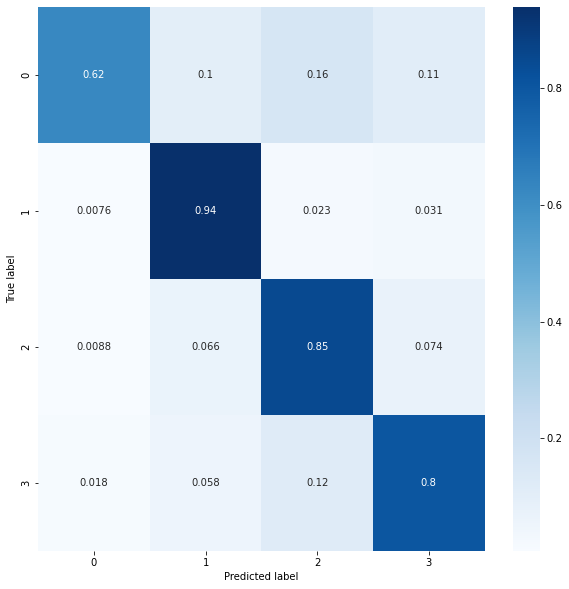

In [49]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, cmap=plt.cm.Blues, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(con_mat_df)

# Feature Importance

In [50]:
data.columns[:-1]

Index(['L_TYPE_TOKEN_RATIO_LEMMAS', 'L_PROPER_NAME', 'L_PERSONAL_NAME',
       'L_PUNCT', 'L_PUNCT_COM', 'L_PUNCT_SEMC', 'L_PUNCT_COL', 'L_PUNCT_DASH',
       'L_CONT_A', 'L_FUNC_A',
       ...
       'SY_PARATAXIS', 'SY_NON_FINITE', 'SY_QUOTATIONS', 'SY_EXCLAMATION',
       'SY_QUESTION', 'SY_ELLIPSES', 'SY_POSITIONING', 'SY_CONDITIONAL',
       'SY_IMPERATIVE', 'SY_AMPLIFIED_SENT'],
      dtype='object', length=101)

In [51]:
importances = clf.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

feature_names = data.columns[:-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feature_names[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) SY_QUOTATIONS                  0.162390
 2) L_PUNCT_DASH                   0.074839
 3) L_PUNCT_COL                    0.074433
 4) L_ANIM_NOUN                    0.026492
 5) L_INANIM_NOUN                  0.025290
 6) SY_DIRECT_SPEECH               0.022514
 7) L_GEN_CASE                     0.018703
 8) L_TYPE_TOKEN_RATIO_LEMMAS      0.018376
 9) SY_QUESTION                    0.016297
10) L_PROPER_NAME                  0.013191
11) L_NOUN_MASCULINE               0.013138
12) VF_TRANSITIVE                  0.011512
13) L_PUNCT                        0.011245
14) L_PRON_DEM                     0.010734
15) L_NOUN_NEUTRAL                 0.010709
16) L_PRON_INT                     0.010417
17) L_CONT_T                       0.010260
18) L_FUNC_T                       0.010206
19) L_PERSONAL_NAME                0.010131
20) POS_DET                        0.010087
21) POS_ADV                        0.009813
22) L_NUM_CARD                     0.009503
23) L_SURNAMES                  

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features at every split
max_features = ["auto", "sqrt"]

# max depth
max_depth = [int(x) for x in np.linspace(100, 300, num = 11)]
max_depth.append(None)

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

# Random search of parameters
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, random_state=66, n_jobs = -1)

# Fit the model
clf_random.fit(X_train, y_train)

print(clf_random.best_params_)

